In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import *
import itertools

import os

import xgboost as xgb 
from xgboost import plot_importance , XGBClassifier

import lightgbm as lgbm
from lightgbm import LGBMClassifier

from keras.utils.np_utils import to_categorical 
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *

from tqdm import tqdm, notebook
import time

In [2]:
train = pd.read_csv('./open data/train.csv')
test = pd.read_csv('./open data/test_x.csv')
train_copy = train.copy()
test_copy = test.copy()

In [4]:
Answers = []
for i in range(20):
    Answers.append('Q'+chr(97+i)+'A')

<AxesSubplot:>

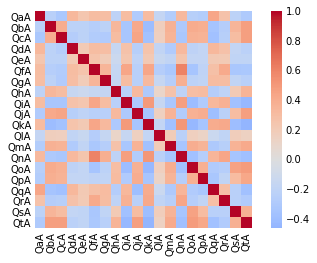

In [5]:
corr = train_copy[Answers].corr(method='spearman')
sns.heatmap(corr, cmap='coolwarm', square=True, center=0)

In [6]:
reverse_col = ['QeA','QfA','QkA','QqA','QrA']
for col in reverse_col:
    train_copy[col] = -train_copy[col]

<AxesSubplot:>

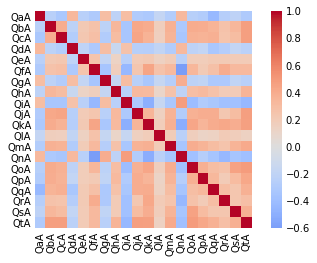

In [8]:
corr = train_copy[Answers].corr(method='spearman')
sns.heatmap(corr, cmap='coolwarm', square=True, center=0)

In [9]:
reverse_col = ['QaA','QdA','QgA','QiA','QnA']
for col in reverse_col:
    train_copy[col] = -train_copy[col]

<AxesSubplot:>

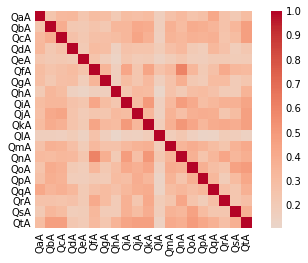

In [10]:
corr = train_copy[Answers].corr(method='spearman')
sns.heatmap(corr, cmap='coolwarm', square=True, center=0)

In [11]:
train_copy['Mach_score'] = train[Answers].mean(axis=1)
train_copy.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Mach_score
0,0,-3.0,363,4.0,1370,5.0,997,-1.0,1024,-2.0,...,1,0,1,1,0,1,0,1,1,3.05
1,1,-5.0,647,5.0,1313,3.0,3387,-5.0,2969,-1.0,...,1,0,1,1,0,1,0,1,1,3.20
2,2,-4.0,1623,1.0,1480,1.0,1021,-4.0,3374,-5.0,...,1,0,1,1,1,1,0,1,1,2.80
3,3,-3.0,504,3.0,2311,4.0,992,-3.0,3245,-1.0,...,0,0,0,1,0,1,0,1,1,3.55
4,4,-1.0,927,1.0,707,5.0,556,-2.0,1062,-1.0,...,1,1,1,1,0,1,1,1,1,2.90


In [13]:
train_copy = train_copy.drop(Answers,axis=1)
train_copy.head()

,index,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,...,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Mach_score
0,0,363,1370,997,1024,1577,539,586,1095,1142,...,1,0,1,1,0,1,0,1,1,3.05
1,1,647,1313,3387,2969,4320,2190,826,4082,1867,...,1,0,1,1,0,1,0,1,1,3.20
2,2,1623,1480,1021,3374,1333,531,1167,1016,2653,...,1,0,1,1,1,1,0,1,1,2.80
3,3,504,2311,992,3245,357,1519,159,2275,2809,...,0,0,0,1,0,1,0,1,1,3.55
4,4,927,707,556,1062,1014,628,991,1259,1153,...,1,1,1,1,0,1,1,1,1,2.90
